In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
## kaggle
df = pd.read_csv("player_valuations.csv")

In [6]:
df.shape

(464782, 5)

In [7]:
df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
464777,1073997,2024-01-08,150000,18,L1
464778,361508,2024-01-10,300000,39,L1
464779,705337,2024-01-10,125000,26459,UKR1
464780,800946,2024-01-10,1000000,79,L1


In [8]:
# cambiamos el nombre de la col

df.rename(columns={'market_value_in_eur': 'precio_en_euros'}, inplace=True)

In [9]:
# ordenamos el df

df_sorted = df.sort_values(by='precio_en_euros', ascending=False)
df_sorted

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
292158,342229,2019-12-19,200000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
252371,342229,2018-12-17,200000000,583,FR1
443838,418560,2023-06-20,180000000,281,GB1
328329,342229,2020-10-15,180000000,583,FR1
...,...,...,...,...,...
395384,202836,2022-05-31,10000,24,L1
407532,621346,2022-06-28,10000,276,IT1
407547,696617,2022-06-28,10000,4083,IT1
407184,49681,2022-06-28,10000,2381,TR1


### Estadistica Desciptiva

#### Resumen estadístico básico

In [11]:
# configurar el formato de visualización para mostrar números completos

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,player_id,precio_en_euros,current_club_id
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


In [12]:
## funciones de pandas

df['precio_en_euros'].mean()

np.float64(2359657.620129437)

In [13]:
df['precio_en_euros'].median()

np.float64(500000.0)

In [14]:
df['precio_en_euros'].mode()

0    300000
Name: precio_en_euros, dtype: int64

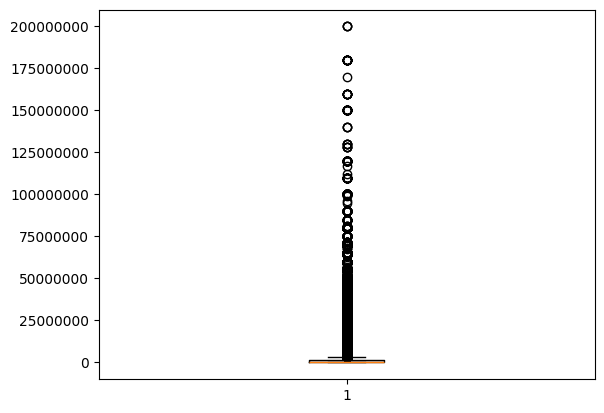

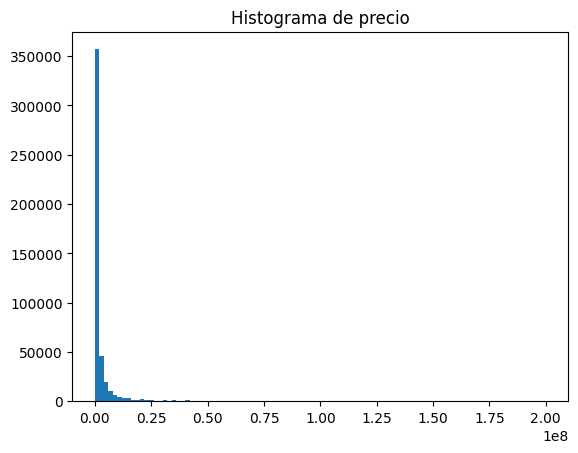

In [15]:
# ajustar la escala del y para mostrar números completos

plt.ticklabel_format(style='plain', axis='y')

# boxplot con matplotlib

plt.boxplot(df['precio_en_euros'])
plt.show()


# histograma con matplot

plt.hist(df['precio_en_euros'], bins=100)
plt.title('Histograma de precio')
plt.show()

In [16]:
## tenemos muchos outlayer

### Limpieza de datos utilizando el IQR

Este proceso está relacionado con la identificación y tratamiento de outliers
en un conjunto de datos. Aqui hay una explicación:

1. cálculo de los cuartiles (Q1, Q3)

* Q1 representa el primer cuartil, que es el valor por debajo del cual se encuentran los 25% de los datos

* Q3 representa el 3er cuartil, que es el valor por debajo del cual se encuentran el 75% de los datos

estos cuartiles dividen el conjunto de datos en 4 partes iguales.

2. calculo de rango intercuartílico (IQR)

* El rango intercuartílico es la diferencia entre el tercel cuartil (Q3) y el primer cuartil (Q1)

IQR = Q3 - Q1

3. definición de límites por Outliers

* se establecen límites superior e inferior para identificar valores atípicos en los datos
* el límite inferior se calcula restando 1.5 veces el IQR a Q1: lower_bound = Q1 - 1.5 * IQR

* El limite superior se calcula sumando 1.5 veces el IQR a Q3: upper_bound = Q3 + 1.5 * IQR

4. identificación de outliers

* cualquier valor en el conjunto de datos que sea menor que el limite inferior o mayor que el límite superior se considera un outlier

Este enfoque, basado en el rango intercuartílico y los limites establecidos, es una tecnica común para identificar y manejar valores atípicos en un conjunto de datos. La idea es que los valores atípicos están más alla de ciertos límites estadísitcos y pueden ser tratados de manera especial segun los requisitos del análisis.